# 7. XGBoostfh 외계 행성 찾기
- 이 장에서 XGBClassifier로 외계 행성 찾기 위해 우주로 여행을 떠나보겠다.
- 이장의 목적은 두가지다. 
- **하나는 일반적으로 XGBoost로 수행하는 실제 작업을 위해 탑다운 방식으로 연습하는 것이 중요하다.**
- XGBoost로 외계 행성을 찾지 못할 수 있지만 측정 지표 선택, 측정 지표를 유념한 하이퍼파라미터 튜닝을 포함하여 여기서 구현한 전략은 XGBoost실전 사용에 적용할 수 있다.
- **이 사례 연구의 두 번째 목적은 이 장의 핵심 주제인 불균형한 데이터셋을 다루는 데 익숙해지는 것이 모든 머신러닝 기술자의 필수사항이기 때문이다.**
---
- 구체적으로 오차행렬, 분류 리포트를 사용하고, 정밀도와 재현율을 이해하고, 데이터 리샘플링, scale_pos_weight 적용 등과 같은 새로운 기술을 배우겠다. XGBClassifier로 최상의 결과를 얻으려면 불균형한 데이터를 세심하게 분석하고 명확한 목표가 있어야 한다. 이 장에서 우주에서 외계 행성을 찾기 위해 빛 데이터를 분석하는 이장의 탑다운 연구에서 핵심은 XGBClassifier이다.
---
- 이장에서는 다음과 같은 내용을 다룬다.
- 외계 행성 찾기
- 오차 행렬 분석
- 불균형 데이터 리샘플링
- XGBClassifier 튜닝 

# 7.1 외계 행성 찾기
- 이 절에서 외계 행성 데이터셋을 분석하면서 탐험을 시작해보겠다. 
- 외계 행성 탐사에 대한 역사를 소개하고 그래프를 그리고 분석하여 외계 행성을 탐지해보겠다.
- 그래프는 시계열 데이터셋에서 통창을 얻을 수 있는 중요한 머신러닝 기술이다.
- 마지막으로 머신러닝으로 초기예측을 만들고 단점을 찾아보겠다.

# 7.1.1 역사적 배경
- 천문학자들은 고대부터 빛에서 정보를 수집해왔다.
- 망원경의 등장으로 17세기에 천문학 지식이 크게 늘어났다. 망원경과 수학 모델을 결합하여 18세기 천문학자들은 태양계 내에서 행성위 위치와 일식을 매우 정확하게 예측했다.
---
- 20세기에는 더 발전된 기술과 복합한 수학을 활용하여 천문학 연구가 계속되었다. 외계 행성이라고 불리는 다른 별들 주위를 도는 행성들이 생명체 거주가능 영역 안에서 발견되었다. 거주가능 영역 안에 있는 행성은 외계 행성의 위치와 크기가 지구와 비슷해 액체 상태의 물과 생명체가 있을 가능성이 높다는 뜻이다.
---
- 이 외계 행성들은 망원경으로 직접 볼 수 없으며 별빛의 주기적인 변화를 통해 추론할 수 있다.
- 별 주위를 주기적으로 돌면서 별빛의 감지 가능한 부분을 막을 정도로 큰 물체는 행성이다. 별빛으로 외계 행성을 발견하려면 오랜시간동안 빛의 변동을 측정해야 한다.
- 빛의 변화는 종종 매우 미묘하기 때문에 외계 행성이 실제로 존재하는지 여부를 결정하는 것은 쉽지 않다. 이 장에서 XGBoost로 별에 외계 행성이 있는지 예측해보겠다.

# 7.1.2 외계 행성 데이터셋
- 4장에서 XGBoost가 다른 앙상블 방법에 비해 대규모 데이터셋에서 속도에 장점이 있다는 것을 보이기 위해 외계 행성 데이터셋을 사용했다. 이 장에서는 외계 행성 데이터셋에 대해 자세히 알아보겠다.
---
- 외계 행성 데이터셋은 NASA 케플러 우주망원경에서 가져온 것이다. 
- 이 데이터셋에 있는 별 중에서 5,050개는 외계 행성이 없고 37개는 외계 행성을 가지고 있다.
---
- 3,000개 이상의 열과 5,000개 이상의 행이 있기 때문에 총 1,500만개 이상의 원소가 있다.
- 100개의 XGBoost 트리와 곱하면 15억개 데이터 포인트를 처리하는 셈이 된다.
- 문제를 간단히 하기 위해 일부 데이터셋으로 시작하겠다. 시간을 절약하기 위해 일부 데이터로 시작하는 것은 대규모 데이터셋을 처리할 때 일반적인 방법이다.
---
- pd.read_csv()함수에는 행의 개수를 제한할 수 잇는 nrows 매개변수가 있다. nrows=n으로 지정하면 파일에서 처음 n개의 행을 읽는다. 데이터 구조에 따라 일부 데이터가 전체를 대표하도록 만들기 위해서는 추가적인 코드가 필요할 수도 있다.
---
- pandas를 임포트하고 nrows= 400으로 exoplanets.csv파일을 로드한다. 그다음 처음 다섯개 행을 출력한다.

In [1]:
import pandas as pd
df = pd.read_csv('exoplanets.csv', nrows = 400)
df.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


- 이 데이터프레임은 많은 열을 가지고 있다.(3,198개). 
- 빛의 주기적인 변화를 관찰 할 때 주기성을 찾으려면 충분한 데이터 포인트가 필요하다.
- 태양계 안에 있는 행성의 공전은 88일(수성)에서 165년(해왕성)까지 다르다. 외계 행성이 감지되었다면 행성이 별 앞을 공전할 때 이를 놓치지 않도록 데이터 포인트를 충분히 자주 모아야 한다.
- 이 데이터셋에는 외계 행성을 가진 별이 37개뿐이므로 400개의 샘플 중에는 몇 개가 포함되었는지 확인하는 것이 중요하다.
---
- value_counts() 메서드는 특정 열에 있는 고유 값의 개수를 계산한다. 다음 코드를 사용해 label열에서 외계 행성을 가진 별의 개수를 확인할 수 있다.

In [2]:
df['LABEL'].value_counts()

1    363
2     37
Name: LABEL, dtype: int64

## 7.1.3 그래프 시각화
- 외계 행성이 별의 빛을 가릴 때 광속이 감소될 것이다.
- 광속이 주기적으로 감소된다면 외계행성이 존재할 가능성이 높다. 정의상 행성은 별을 도는 큰 물체이기 때문이다.
- 이 그래프를 시각화해보겠다.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

In [24]:
X = df.iloc[:,1:]
y = df.iloc[:,0] -1

In [25]:
# 3. light_plot()함수를 작성한다.
# 이 함수는 데이터 인덱스(행)을 받아 x축은 관측횟수, y축은 빛의 밝기인 그래프를 그리고 그래프에 적절한 레이블을 부여한다.

def light_plot(index):
    y_vals = X.iloc[index]
    X_vals = np.arange(len(y_vals))
    plt.figure(figsize = (15,8))
    plt.xlabel('Number of Observation')
    plt.ylabel('Light Flux')
    plt.title('light plot' + str(index), size = 15)
    plt.plot(X_vals, y_vals)
    plt.show()

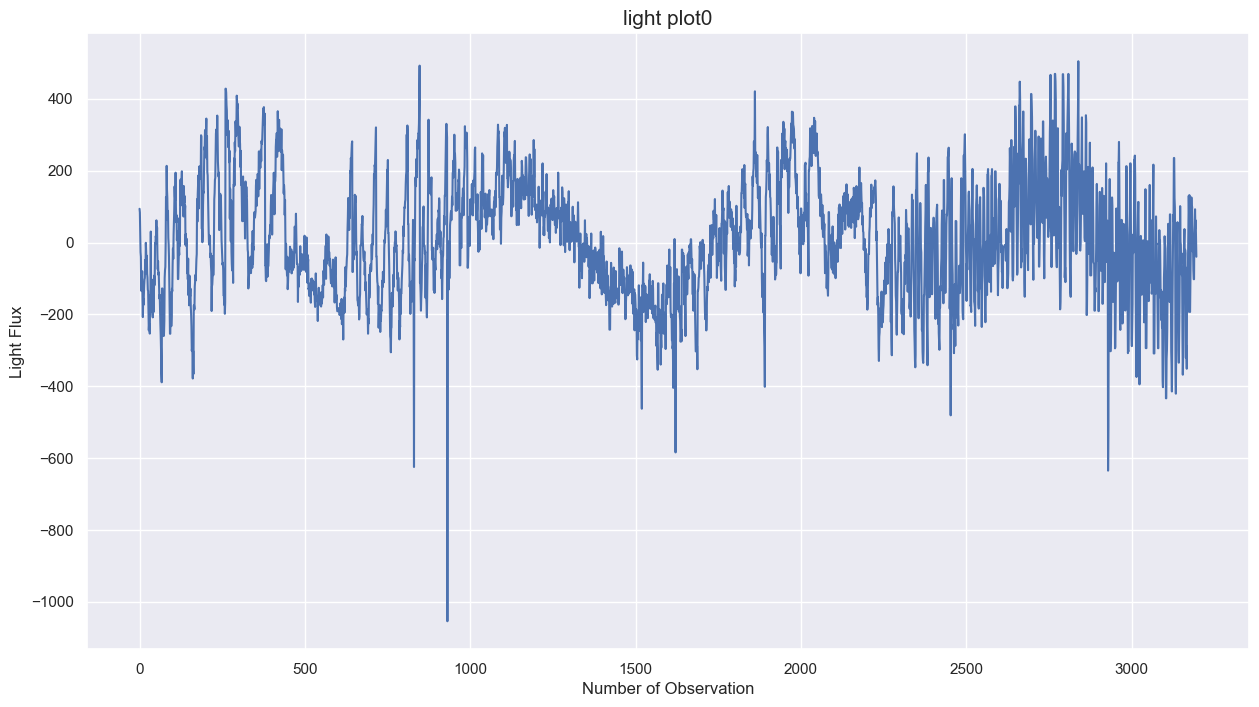

In [26]:
# 4. 인덱스 0으로 함수를 호출해보자. 이 별은 외계 행성을 가진 별이다.
light_plot(0)

# 데이터에 주기적으로 나타나는 감소가 있다. 하지만 이 그래프만으로 외계행성이 있는지 결론을 내기에는 확실하지 않다.

In [27]:
np.arange(len(X.iloc[0]))

# 즉, y_vals 배열의 길이가 5이므로, np.arange(5)는 0부터 4까지의 정수로 구성된 NumPy 배열 [0, 1, 2, 3, 4]를 반환합니다.
# 이는 인덱스를 나타내거나, 배열을 순회하거나, 다양한 연산에 활용되는 일반적인 NumPy 기능 중 하나입니다.

array([   0,    1,    2, ..., 3194, 3195, 3196])

In [28]:
(X.iloc[0])

FLUX.1       93.85
FLUX.2       83.81
FLUX.3       20.10
FLUX.4      -26.98
FLUX.5      -39.56
             ...  
FLUX.3193    92.54
FLUX.3194    39.32
FLUX.3195    61.42
FLUX.3196     5.08
FLUX.3197   -39.54
Name: 0, Length: 3197, dtype: float64

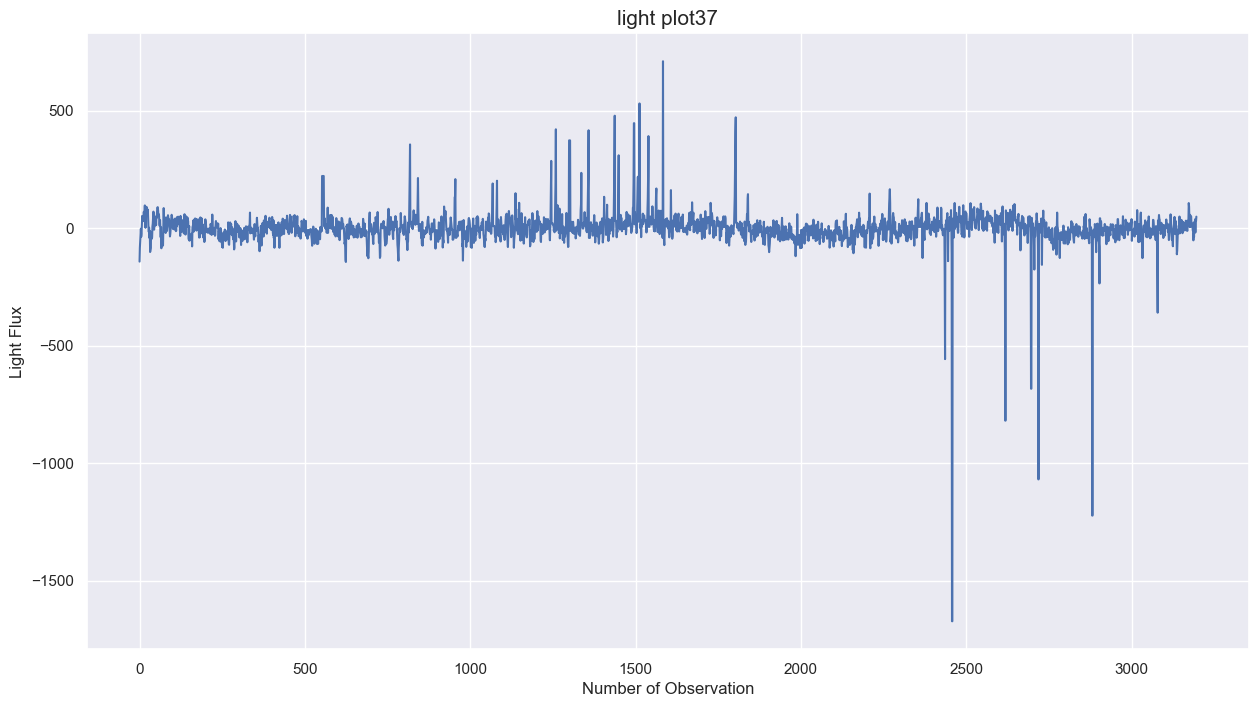

In [29]:
# 5. 비교를 위해 데이터셋에서 외계 행성을 가지지 않은 첫 번째 별인 인덱스 37을 출력해보자.
light_plot(37)

# 빛의 밝기가 증가하거나 감소하지만 전 영역에 걸쳐 있지는 않다.
# 빛 감소가 데이터에 보이지만 그래프 전체에 주기적으로 나타나지는 않는다.
# 감소의 빈도가 지속적으로 반복되지 않는다. 이런 증거만으로는 외계 행성이 존재한다고 결정하기 충분하지 않다.

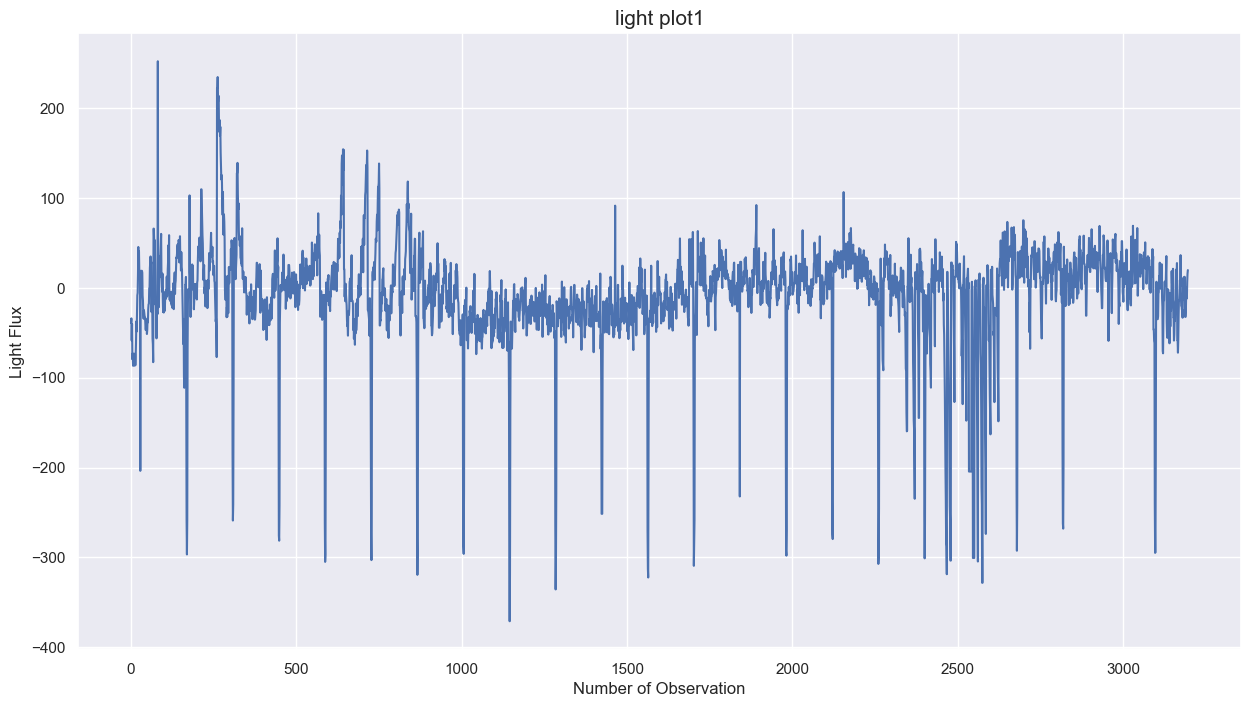

In [30]:
# 두 번째 별의 그래프를 그려보자
light_plot(1)

- 이 그래프는 빛 감소가 명확하게 주기적으로 나타나기 때문에 외계 행성이 있을 가능성이 높다.
- 모든 그래프가 이처럼 명확하다면 머신러닝이 필요하지 않을 터..
- 다른 그래프를 보면 외계 행성의 존재를 결정하기가 보통 이렇게 명확하지 않다.
---
- 여기서 목적은 그래프만으로는 외계 행성을 구분하기 어렵다는 것을 강조하기 위함이다.
- 천문학자들은 여러 가지 방법을 사용해 외계 행성을 구분하며 머신러닝은 그 중에 한 방법이다.
---
- 이 데이터셋은 시계열 데이터이지만 다음 번의 광속을 예측하는 것이 목적이 아니다.
- 전체 데이터를 사용해 외계 행성을 가진 별을 분류하는 것이다. 
- 이런 점에서 머신러닝 분류기를 사용해 별의 외계 행성이 있는지 예측할 수 있다.
- 주어진 데이터에서 분류기를 훈련하고 이를 사용해 새로운 데이터에서 외계 행성이 있는지 예측한다.
- 이 장에서는 XGBClassifier를 사용해 데이터에서 외계 행성을 가진 별을 분류해보겠다.
- 분류 작업으로 들어가기 전에 먼저 데이터를 준비해보자.

## 7.1.4 데이터 준비
- 이전 절에서 그래프만으로는 외계 행성의 존재를 결정하기에 충분하지 않다는 것을 알았다.
- 이런 경우에 머신러닝이 도움이 될 수 있다.
- 먼저 데이터를 준비해보겠다.

In [31]:
# 1. 데이터가 모두 수치형이고 누락된 값이 없어야 한다.
# df.info()를 사용해 데이터 타입과 누락된 값을 확인해보자.
df.info()
# 모든 열이 수치형이다. 열 개수가 많아서 누락된 값에 대한 정보가 제공되지 않았다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Columns: 3198 entries, LABEL to FLUX.3197
dtypes: float64(3197), int64(1)
memory usage: 9.8 MB


In [32]:
df.isna().sum().sum()
# 누락된 값이 없고 수치형 데이터이므로 머신러닝 모델을 만들어보겠다.

0

##  7.1.5 초기 XGBClassifier
- 초기 XGBCLassifier 모델을 만들기 위해 다음 과정을 따른다.


In [33]:
# XGBRegressor를 임포트합니다.
from xgboost import XGBClassifier

# accuracy_score를 임포트합니다.
from sklearn.metrics import accuracy_score

# train_test_split를 임포트합니다.
from sklearn.model_selection import train_test_split

# 데이터를 훈련 세트와 테스트 세트로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [34]:
# XGBClassifier를 초기화합니다.
model = XGBClassifier(booster='gbtree')

# 훈련 세트로 모델을 훈련합니다.
model.fit(X_train, y_train)

# 테스트 세트에 대한 예측을 만듭니다.
y_pred = model.predict(X_test)

score = accuracy_score(y_pred, y_test)

print('점수: ' + str(score))

점수: 0.89


- 89%의 별을 올바르게 분류했으니 출발이 좋은 것 같다. 하지만 여기에는 숨겨진 문제가 있다.
---
- 이모델을 천문학자에게 보여준다고 생각해보자. 이 천문학자가 데이터 분석을 잘 알고 있다면 다음과 같이 말할 것이다.
- "89% 정확도를 달성했군요. 하지만 이 데이터에서 외계 행성을 가진 별은 10%뿐입니다. 무조건 외계 행성이 없다고 예측하는 모델보다 이 모델이 더 낫다고 말할 수 있나요?
---
- 여기 문제가 있다. 10개의 별 중 9개가 외계 행성을 가지고 있지 않기 때문에 모델이 외계 행성이 벗는 별이라고 무조건 예측하면 대략 90% 정확도가 된다. **불균형한 데이터에서는 정확도로 충분하지 않다.**

# 7.2 오차 행렬 분석하기
- 오차 행렬은 분류 모델에서 올바른 예측과 잘못된 예측을 요약해 놓은 테이블이다.
- 오차 행렬은 어떤 예측이 정확하고 어떤 예측이 틀렸는지 정보를 많이 제공하기 때문에 불균형한 데이터셋을 분석하는 데 이상적이다.


## 7.2.1 confusion_matrix( 오차 행렬)

In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
confusion_matrix(y_test, y_pred)

array([[86,  2],
       [ 9,  3]])

- 오차 행렬의 대각선에 있는 숫자는 외계 행성이 없는 86개의 별과 외계 행성이 있는 3개의 별을 올바르게 예측했다는 것을 보여준다.
---
- 이 행렬의 오른쪽 위 코너에 있는 숫자 2는 외계 행성이 없는 2의 별을 외계 행성을 가지고 있다고 잘못 분류했다는 것을 나타낸다.
- 비슷하게 왼쪽 아래에 있는 숫자 9는 외계 행성이 있는 9개의 별을 외계 행성이 없다고 잘못 분류한 것을 나타낸다.
---
- 행을 따라 분석하면 외계 행성이 없는 88개의 별 중에 86개가 올바르게 분류되었고,
- 외계 행성이 있는 12개의 별 중에 3개만 올바르게 분류되었다.
>요약하면, 위는 88개의 별중에서 86개의 별을 외계행성이 없다고 올바르게 분류하였고 

>아래는 12개중에 3개에 외계행성이 있다고 올바르게 분류하였다.

## 7.2.2 classification_report
- 분류 리포트는 이전 절의 오차 행렬에 담긴 숫자를 바탕으로 다양한 비율을 제공한다.
- 분류 리포트를 확인해보자.

In [37]:
# 1. 함수 임포트
from sklearn.metrics import classification_report

In [38]:
# 2. 순서대로 y_test와 y_pred를 매개변수로 전달하여 classification_report() 함수를 호출한다. 
# 그 다음 이 함수의 반환 값을 출력한다.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94        88
           1       0.60      0.25      0.35        12

    accuracy                           0.89       100
   macro avg       0.75      0.61      0.65       100
weighted avg       0.87      0.89      0.87       100



- 이 점수가 무엇을 의미하는지 이해하는 것이 중요하다. 하나씩 알아보자.

### 정밀도
- 정밀도는 양성 클래스(레이블 2)를 올바르게 예측한 비율이다. 이 값은 진짜 양성과 거짓 양성으로 정의된다.
> 오차 행렬에서 진짜 양성은 두번째 행의 두번째 열의 값이고, 거짓양성은 첫번째 행의 두 번째 열의 값이다.

#### 진짜 양성
- 정의: 올바르게 양성으로 예측된 양성 샘플의 개수
- 예: 외계 행성 데이터셋의 경우 레이블 2로 예측된 레이블 2의 개수

#### 거짓양성
- 정의: 올바르지 않게 양성으로 예측된 음성 샘플의 개수
- 예: 외계 행성 데이터셋의 경우 레이블2로 잘못 예측된 레이블 1의 개수

- 정밀도의 정의는 종종 다음과 같은 수식으로 표현된다.

> 정밀도 = TP/(TP + FP)
- 여기서 TP는 진짜 양성이고 FP는 거짓 양성이다.
- 외계 행성 데이터셋의 경우 다음과 같이 계산가능하다.

> 외계 행성을 가진 별의 정밀도 = 3/ (3+2) = 0.6

> 외계 행성이 없는 별의 정밀도 = 86/ 86+ 9 = 0.91

- 정밀도는 각 타깃 클래스에 대해 올바르게 예측한 비율을 제공한다. 
- 이제 분류 리포트에 있는 다른 점수를 알아보겠다.

In [39]:
confusion_matrix(y_test, y_pred)

array([[86,  2],
       [ 9,  3]])

### 재현율
- 재현율은 예측하지 못한 양성 클래스의 비율이다. 재현율은 진짜 양성 개수를 진짜 양성과 거짓 음성을 더한 값으로 나누어 구할 수 있다.

#### 거짓 음성
- 다음은 거짓음성의 정의와 예이다.
- 정의: 올바르지 않게 음성으로 예측된 양성 샘플의 개수
- 예: 외계 행성 데이터셋의 경우 레이블1로 잘못 예측된 레이블2의 개수
---
- 재현율의 공식은 다음과 같다.
> 재현율 = recall = TP / (TP + FN)
---
- 외계 행성 데이터셋의 경우 다음과 같이 계산가능하다.
> 외계 행성을 가진 별의 재현율 = 3 / (3 + 9) = 0.25
> 외계 행성이 없는 별의 재현율 = 86 / (86 + 2) = 0.98
---
- 재현율은 얼마나 많은 양성 샘플을 찾았는지 말해준다.
- 외계 행성 데이터셋의 경우 외계 행성을 가진 별의 25%만 찾았다.

### F1 점수
- F1 점수는 정밀도와 재현율의 조화 평균이다.( 2* (정밀도 * 재현율)/(정밀도 + 재현율))
- 정밀도와 재현율의 분모가 다르기 때문에 이를 동일하게 만들기 위해 조화 평균을 사용한다.
- 정밀도와 재현율이 모두 중요할 때 F1 점수를 사용하는 것이 좋다. F1점수는 0~1 사이의 값이며 1이 가장 좋은 값이다.

## 7.2.3 다른 평가 방법
- 정밀도, 재현율, F1 점수는 사이킷런에서 제공하는 평가 방법이다. 전체 평가 방법은 공식문서에서 찾을 수 있다.
> 정확도는 분류 작업에서 종종 최상의 선택이 아니다. 또 다른 인기있는 평가 방법은 ROC곡선 아래의 면적인 roc_auc_score함수다. 대부분의 분류 작업의 평가 방법과 마찬가지로 1에 가까울수록 좋다.
---
- 평가 방법을 선택할 때 목표를 이해하는 것이 중요하다.
- 외계 행성 데이터셋의 목표는 외계 행성을 찾는 것이다. 이는 분명한 목표다.
- 원하는 결과를 얻기 위해 가장 좋은 평가 방법을 선택한다.
---
- 두개의 시나리오를 생각해보자.
- 시나리오1: 머신러닝 모델이 예측한 4개의 외계 행성을 가진 별 중에 3개가 실제로 외계 행성을 가졌다면 **정밀도**는 3/4 = 75%이다.
- 시나리오2: 외계 행성을 가진 12개 별 중에서 모델이 8개의 별을 정확하게 예측했다면 **재현율**은 8/12 = 66%이다.
---
- 어떤 것이 나은가?
- 정답은 상황에 따라 다르다. 재현율은 양성 샘플(외계 행성을 가진 별)을 모두 찾는 것이 목표일 때 가장 잘 맞다.
- 정밀도는 양성 샘플로 예측한 것이 모두 맞아야 할 때 이상적이다.
---
- 정답은 상황에 따라 다르다.
- 재현율은 양성 샘플을 모두 찾는 것이 목표일 때 잘 맞는다. 정밀도는 양성 샘플로 예측한 것이 모두 맞아야 할 때 이상적이다.
---
- 천문학자들은 머신러닝 모델이 예측했기 때문에 외계행성을 찾았다고 발표하지 않을 것 같다.
- 외계 행성을 가진 후보 별을 주의 깊게 조사하고 추가적인 증거를 기반으로 예측 결과를 확인하거나 반박할 것이다.
---
- 머신러닝 모델의 목표가 가능한 많은 외계 행성을 찾는 것이라면 재현율이 좋은 선택이다.
- 왜일까? 재현율은 외계 행성을 가진 12개의 별 중 몇 개를 찾았는지 알려주기 때문이다.
> 높은 정밀도는 외계 행성을 가진 별을 더 많이 찾았다는 것을 의미하지 않는다. 예를 들어 1/1의 정밀도는 100%이지만 외계 행성을 가진 별 하나만 찾은 것이다.


### reacall_score
- 이전 절에서 언급했듯이 가능한 많은 외계 행성을 찾기 위해 재현율을 외계 행성 데이터셋의 평가 방법으로 사용하겠다. 

In [40]:
from sklearn.metrics import recall_score

# 기본적으로 recall_score()는 양성 클래스(일반적으로 레이블 1)의 재현율 점수를 계산한다. 
# 외계 행성 데이터셋처럼 음성 클래스가 레이블 1이고 양성 클래스가 레이블 2인 경우는 드물다.

In [41]:
# 2. 외계 행성 데이터셋의 예측결과에서 recall_score()를 호출하려면 y_test,y_pred와 함께 pos_label = 2로 지정해야한다.
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

# 이 값은 분류 리프토에서 레이블 2(외계 행성을 가진 별)에 해당하는 재현율과 같다. 
# 앞으로 accuracy_score()대신에 recall_score()를 평가 방법으로 사용하겠다.
# 다음으로 불균현한 데이터셋에서 성능을 향상시킬 수 있는 중요한 전략인 리샘플링에 대해 배워보자.

0.25

## 7.3 불균형 데이터 리샘플링
- 외계  행성을 찾기 위한 적절한 평가 방법을 선택했다. 이제 낮은 재현율 점수를 만드는 데이터 불균형 문젤를 고치기 위해 리샘플링, 언더샘플링, 오버샘플링 같은 전략을 알아보갰다.

## 7.3.1 리샘플링
- 불균형 데이터에 대응하는 한가지 전략은 데이터 리샘플링이다. 다수 클래스의 샘플을 줄이기 위해 데이터를 언더샘플링하거나 소수 클래스의 샘플을 늘리기 위해 데이터를 오버샘플링할 수 있다.

## 7.3.2 언더샘플링
- 앞에서 5,807개 샘플 중에서 400개를 선택했다. 이 서브셋은 원본 데이터셋의 일부를 포함하고 있기 때문에 언더샘플링의 한 예이다.
- 임의의 개수를 지정해 데이터에서 언더샘플링하는 함수를 작성해보자. 이 함수는 언더샘플링 결과가 어떻게 변하는지 알 수 있도록 재현율 점수를 반환한다. Xgb_clf()함수를 작성해보자.

### xgb_clf 함수
- 다음 함수는 XGBClassifier 모델과 행 개수를 입력으로 받고 오차 행렬, 분류 리포트, 외계 행성을 가진 별의 재현율 점수를 출력한다.

### xgb_clf 함수
- 다음 함수는 XGBClassifier 모델과 행 개수를 입력으로 받고 오차 행렬, 분류 리포트, 외계행성을 가진 별의 재현율 점수를 출력한다.

In [44]:
# 1. 머신러닝 모델 Model, 행 개수 rows를 입력으로 받는 xgb_clf()함수를 정의한다.
# 2. nrows만큼 데이터프레임으로 로드하고 x와 y를 훈련세트와 테스트 세트로 나눈다.
def xgb_clf(model, nrows):

    df = pd.read_csv('exoplanets.csv', nrows=nrows)
    # 데이터를 X와 y로 나눕니다.
    X = df.iloc[:,1:]
    y = df.iloc[:,0] -1

    # 데이터를 훈련 세트와 테스트 세트로 나눕니다.
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

    # 훈련 세트에서 모델을 훈련합니다.
    model.fit(X_train, y_train)

    # 테스트 세트에 대한 예측을 만듭니다.
    y_pred = model.predict(X_test)

    score = recall_score(y_test, y_pred)
    
    print(confusion_matrix(y_test, y_pred))
    
    print(classification_report(y_test, y_pred))
        
    return score
    

In [61]:
xgb_clf(XGBClassifier(), nrows = 800)

[[189   1]
 [  9   1]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       190
           1       0.50      0.10      0.17        10

    accuracy                           0.95       200
   macro avg       0.73      0.55      0.57       200
weighted avg       0.93      0.95      0.93       200



0.1

## 7.3.3 오버샘플링
- 또 다른 리샘플링 기법은 오버샘플링이다. 오버샘플링은 샘플 개수를 줄이는 것이 아니라 부족한 클래스의 샘플을 복사하고 추가하여 샘플 수를 늘린다.
---
- 원본 데이터셋이 5,000개 행이 넘지만 간단하게 시작하기 위해 norws = 400을 사용했다.
---
- n_rows = 400일 때 음성클래스와 양성 클래스의 비율은 약 10대 1이다. 균형을 맞추려면 양성 클래스 샘플을 10배 늘려야하낟.
- 이를 위한 전략은 다음과 같다.
> 양성클래스 샘플을 아홉번 복사한 새로운 데이터프레임을 만든다. -> 새로운 데이터프레임과 원본 데이터프레임을 합쳐서 1:1비율을 만든다.
---
- 더 진행하기 전에 주의할 점이 있다. 데이터를 훈련 센트와 테스트 세트로 나누기 전에 리샘플링을하면 점수가 부풀려진다. 이유가 무엇일까?
---
- 리샘플링을할 때 양성 클래스 샘플에 대해 아홉 개의 복사본이 만들어진다. 이 데이터를 훈련세트와 테스트 세트로 나누면 복사본이 두 세트에 들어갈 가능성이 높다. 따라서 테스트 세트는 훈련세트와 동일한 샘플을 나누어 가지게 된다.
---
- 적절한 방법은 데이터를 훈련 세트와 테스트 세트로 먼저 나누고 그다음 리샘플링을 수행하는 것이다.
- 따라서 앞에서 나누어 놓은 x_train, x_test, y_train, y_train를 사용한다. 시작하자.

# 7.4 XGBClassifier 튜닝
- 이 절에서 외계 행성 데이터셋에서 가능한 최상의 재현율 점수를 얻도록 XGBClassifier를 튜닝해보겠다.
- 먼저 scale_pos_weight 매개변수를 사용해 가중치를 조정하고 그리드 서치로 최상의 매개변수 조합을 찾는다. 또한 다양한 서브셋에서 모델을 평가하고 결과를 통합하고 분석하겠다.

## 7.4.1 가중치 조정하기
- 5장에서 scale_weight 매개변수를 사용해 힉스 보손 데이터의 불균형에 대응했다.  
- scale_pos_weight는 양성 샘플의 가중치를 조정하기 위해 사용한다.
- 여기에서 양성 샘플이란 점이 중요하다. 사이킷런은 타깃 값1을 양성으로 타깃 값 0을 음성을 생각한다.
- 외계 행성 데이터셋에서는 제공되는 그대로 1이 음성이고 2를 양성으로 사용했다. 판다스 replace()메서드를 사용해 0을 음성으로 1을 양성으로 바꾸겠다.

### replace 메서드
- replace() 메서드를 사용해 열의 값을 재할당할 수 있다. 다음 코드는 LABEL 열에서 1을 0으로 바꾸고, 2를 1로 바꾼다.

In [46]:
df['LABEL'] = df['LABEL'].replace(1,0)
df['LABEL'] = df['LABEL'].replace(2,1)

- 두 코드의 순서를 바꾸면 2가 먼저 1이 되고 그다음 1이 0으로 바뀌기 때문에 모든 값이 0이된다. 프로그래밍에서 순서가 중요하다.
- cross_Val_score함수나 gridsearchcv 클래스를 사용할 때는 재현율 계산을 위해 양성 샘플레이블을 따로 지정할 수 없기 때문에 0,1로 바꿔줘야한다.

In [47]:
df['LABEL'].value_counts()

0    363
1     37
Name: LABEL, dtype: int64

In [58]:
# 1. 새로운 데이터프레임을 타깃 X, 타깃 y로 나눈다.
X = df.iloc[:, 1:]
y = df.iloc[:,0]

In [59]:
# 2. 데이터를 훈련 세트와 테스트 세트로 나눈다.
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=2)

In [60]:
# 3. scale_pos_weight 옵션으로 XGBClassifier 모델을 만들고 훈련하고 평가한다. 전체 결과를 확인하기 위해 오차 행렬, 분류 리포트를 출력한다.
model = XGBClassifier(scale_pos_weight = 10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = recall_score(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(score)

# scale_pos_weight방법은 오버샘플링과 동일한 예측을 만든다.

[[86  2]
 [ 8  4]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.95        88
           1       0.67      0.33      0.44        12

    accuracy                           0.90       100
   macro avg       0.79      0.66      0.69       100
weighted avg       0.89      0.90      0.88       100

0.3333333333333333


## 7.4.2 XGBClassifier 튜닝
- 이제 하이퍼파라미터 튜닝이 재현율을 높일 수 있는지 확인해보겠다.
---
- 하이퍼파라미터 튜닝을 할 때 GridSearchCV와 RandomizedSearchCV를 사용하는 것이 표준이다.
- 두 클래스 모두 두개 이상의 폴드로 교차 검증을 수행한다. 초기 모델의 성능이 뛰어나지 않고 대규모 데이터셋에서 여러 폴드를 테스트하는 작업은 오래 걸리기 때문에 아직 교차 검증을 구현하지 않았다.
---
- 시간을 절약하기 위해 두 개의 폴드로 GridSearchCV와 RandomizedSearchCV를 사용해보겠다. 일관된 결과를 위해 StratifiedKFold를 사용하는 것이 권장된다.
> StratifiedKFold는 머신 러닝에서 교차 검증(Cross-validation)을 수행하는 방법 중 하나로, 불균형한 데이터셋에서 모델의 성능을 정확하게 평가하기 위해 사용됩니다. 교차 검증은 데이터를 여러 개의 폴드(fold)로 나누어 훈련과 검증을 번갈아가며 수행하는 방법으로, 모델의 일반화 성능을 평가하는 데에 유용합니다.
StratifiedKFold는 K-Fold 교차 검증의 한 변종으로, 랜덤하게 데이터를 나누는 대신에 클래스별 비율을 유지하도록 데이터를 분할합니다. 즉, 각 폴드 내에서 클래스의 분포가 전체 데이터셋과 비슷하게 유지되도록 합니다. 이렇게 하면, 특히 불균형한 클래스를 가진 데이터셋에서도 모델의 성능 평가를 더 정확하게 할 수 있습니다.

In [63]:
# 다음은 K-폴드 교차검증으로 기준 모델을 만든다.
# 1. GridSearchCV.RandomizedSearchCV, StratifiedKFold, Cross_val_score()을 임포트한다.
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold, cross_val_score

In [65]:
# 2. n_splits = 2와 shuffle = True로 StratifiedKFold를 초기화한다.
kfold = StratifiedKFold(n_splits=2, shuffle=True, random_state=2)

In [67]:
# 3. 음성 샘플이 양성 샘플보다 10배는 많기 때문에 scale_pos_weight = 10으로 XGBClassifier를 초기화한다.
model = XGBClassifier(scale_pos_weight = 10)

In [69]:
# 4. cv = kfold와 score = 'recall' 매개변수로 cross_val_score() 함수를 호출하여 모델을 평가하고 반환된 점수를 출력한다.
scores = cross_val_score(model,X,y, cv = kfold, scoring = 'recall')
print('재현율:', scores)
print('재현율 평균:', scores.mean())

# 교차 검증으로 점수가 조금 더 나빠졌다. 양성 샘플이 적을 때 어떤 샘플이 훈련세트와 테스트 세트에 포함되는지가 차이를 만든다. 
# StratifiedKFold나 Train_test_split()를 다른 식으로 사용하면 결과가 달라질 것이다.

재현율: [0.10526316 0.27777778]
재현율 평균: 0.1915204678362573


### grid_search
- 이제 6장과 비슷한 grid_search() 함수를 만들어보겠다.

In [79]:
# 1. 새로운 함수는 이전과 동일하게 매개변수 딕셔너리, RandomizedSearchCV를 위한 random옵션을 받습니다. 
# 또한 서브셋을 사용할 수 있게 x와 y를 기본 매개변수로 제공한다. 평가 방법은 재현율을 사용한다.
def grid_search(params, random = False, X=X, y=y,
               model = XGBClassifier(scale_pos_weight = 10, random_state = 2)):
    xgb = model
    if random:
        grid = RandomizedSearchCV(xgb, params, cv = kfold, n_jobs = -1,
                                 random_state = 2, scoring = 'recall')
    else:
        grid = GridSearchCV(xgb, params, cv = kfold, n_jobs = -1, scoring = 'recall')
    grid.fit(X,y)
    best_params = grid.best_params_
    print("최상의 매개변수:", best_params)
    best_score = grid.best_score_
    print("최상의 점수: {:.5f}".format(best_score))

In [78]:
# 2. 기본값을 제외한 매개변수로 그리드 서치를 실행해서 점수를 높여보겠다. 다음은 초기 그리드 서치의 실행과 결과이다.
# a) 그리드 서치1:
grid_search(params = {'n_estimators':[50,200,400,800]})

최상의 매개변수: {'n_estimators': 50}
최상의 점수: 0.19152


In [81]:
# b) 그리드 서치2:
grid_search(params = {'learning_rate':[0.01, 0.05, 0.2, 0.3]})

최상의 매개변수: {'learning_rate': 0.01}
최상의 점수: 0.40351


In [82]:
# c) 그리드 서치3:
grid_search(params = {'max_depth':[1,2,4,8]})

최상의 매개변수: {'max_depth': 2}
최상의 점수: 0.24415


In [85]:
# d) 그리드 서치4:
grid_search(params ={'subsample': [0.3,0.5,0.7,0.9]})

최상의 매개변수: {'subsample': 0.3}
최상의 점수: 0.24561


In [86]:
# e) 그리드 서치5:
grid_search(params = {'gamma':[0.05, 0.1, 0.5, 1]})

최상의 매개변수: {'gamma': 0.05}
최상의 점수: 0.24415
[00:59:28] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "subsmaple" } are not used.

[00:59:28] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "subsmaple" } are not used.

[00:59:28] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "subsmaple" } are not used.

[00:59:28] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "subsmaple" } are not used.

[00:59:28] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "subsmaple" } are not used.

[00:59:28] WARNING: /Users/runner/work/xgboost/x

In [88]:
# 3. learning_rate, max_depth, gamma를 바꾸어 성능을 높였다. 이 매개변수를 범위를 좁혀서 동시에 시도해보자.
grid_search(params = {'learning_rate':[0.001, 0.01, 0.03], 'max_depth':[1,2], 'gamma':[0.025,0.05,0.5]})

최상의 매개변수: {'gamma': 0.025, 'learning_rate': 0.001, 'max_depth': 2}
최상의 점수: 0.53509


In [89]:
# 4. max_delta_step도 시도해볼 가치가 있다. XGBoost는 불균형 데이터셋에서만 이 매개변수를 권장한다.
# 기본값은 0이다. 이 매개변수 값을 증가시키면 더 보수적인 모델이 만들어진다.
grid_search(params = {'max_delta_step':[1,3,5,7]})

최상의 매개변수: {'max_delta_step': 1}
최상의 점수: 0.24415


In [90]:
# 5. 마지막으로 랜덤 서치로 subsample 매개변수와 모든 colsample을 탐색해보겠다.
grid_search(params = {'subsample':[0.3,0.5,0.7,0.9,1],
                     'colsample_bylevel':[0.3,0.5,0.7,0.9,1],
                     'colsample_bynode':[0.3,0.5,0.7,0.9,1],
                     'colsample_bytree':[0.3,0.5,0.7,0.9,1]}, random = True)

최상의 매개변수: {'subsample': 0.3, 'colsample_bytree': 0.7, 'colsample_bynode': 0.7, 'colsample_bylevel': 1}
최상의 점수: 0.35380


- 400개의 샘플로 이루어진 서브셋을 계속 사용하지 않고 74개의 샘플로 이루어진 균형잡힌(언더샘플링된) 서브셋으로 바꾸고 결과를 비교해보자.

### 균형잡힌 서브셋
- 74개 샘플로 이루어진 균형잡힌 서브셋은 최소한 양의 데이터이다. 또한 테스트하기도 빠르다.
---
- 다음처럼 균형잡힌 서브셋을 X_short와 y_short로 정의하자.

In [93]:
X_short = X.iloc[:74, :]
y_short = y.iloc[:74]

In [125]:
grid_search(params = {'max_depth':[1,2,3],
                     'colsample_bynode':[0.5,0.75,1],
                     'learning_rate' : [0.001]},
           X=X_short, y = y_short,
           model = XGBClassifier(random_state = 2))

최상의 매개변수: {'colsample_bynode': 0.5, 'learning_rate': 0.001, 'max_depth': 2}
최상의 점수: 0.65205


### 전체 데이터로 튜닝하기
- 전체 데이터로 grid_search() 함수로 호출하면 오래 걸린다. 마지막이므로 코드를 실행하고 컴퓨터가 일하는 동안 휴식을 취할 차례다.

In [106]:
# 1. 새로운 데이터프레임 df_all로 전체 데이터를 로드한다.
df_all = pd.read_csv('exoplanets.csv')
df_all

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5082,1,-91.91,-92.97,-78.76,-97.33,-68.00,-68.24,-75.48,-49.25,-30.92,...,139.95,147.26,156.95,155.64,156.36,151.75,-24.45,-17.00,3.23,19.28
5083,1,989.75,891.01,908.53,851.83,755.11,615.78,595.77,458.87,492.84,...,-26.50,-4.84,-76.30,-37.84,-153.83,-136.16,38.03,100.28,-45.64,35.58
5084,1,273.39,278.00,261.73,236.99,280.73,264.90,252.92,254.88,237.60,...,-26.82,-53.89,-48.71,30.99,15.96,-3.47,65.73,88.42,79.07,79.43
5085,1,3.82,2.09,-3.29,-2.88,1.66,-0.75,3.85,-0.03,3.28,...,10.86,-3.23,-5.10,-4.61,-9.82,-1.50,-4.65,-14.55,-6.41,-2.55


In [107]:
df_all['LABEL'] = df_all['LABEL'].replace(1,0)
df_all['LABEL'] = df_all['LABEL'].replace(2,1)
df_all

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,1,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,1,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,1,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,1,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,1,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5082,0,-91.91,-92.97,-78.76,-97.33,-68.00,-68.24,-75.48,-49.25,-30.92,...,139.95,147.26,156.95,155.64,156.36,151.75,-24.45,-17.00,3.23,19.28
5083,0,989.75,891.01,908.53,851.83,755.11,615.78,595.77,458.87,492.84,...,-26.50,-4.84,-76.30,-37.84,-153.83,-136.16,38.03,100.28,-45.64,35.58
5084,0,273.39,278.00,261.73,236.99,280.73,264.90,252.92,254.88,237.60,...,-26.82,-53.89,-48.71,30.99,15.96,-3.47,65.73,88.42,79.07,79.43
5085,0,3.82,2.09,-3.29,-2.88,1.66,-0.75,3.85,-0.03,3.28,...,10.86,-3.23,-5.10,-4.61,-9.82,-1.50,-4.65,-14.55,-6.41,-2.55


In [108]:
X_all = df_all.iloc[:,1:]
y_all = df_all.iloc[:,0]

In [111]:
df_all['LABEL'].value_counts()

0    5050
1      37
Name: LABEL, dtype: int64

In [116]:
# 5. 음성 클래스 개수를 양성 클래스 개수로 나누어 가중치를 계산한다.
weight = int(5050/37)
# 완전중요

In [117]:
# 6. scale_pos_weight = weight로 설정한 XGBClassifier로 전체 데이터에 대한 기준 모델을 만들고 평가한다.
model = XGBClassifier(scale_pos_weight=weight)
scores = cross_val_score(model, X_all, y_all, cv=kfold, scoring = 'recall')
print('재현율', scores)
print('재현율 평균', scores.mean())

재현율 [0.10526316 0.        ]
재현율 평균 0.05263157894736842


- 이 점수는 아주 좋지 않다. 아마도 이 모델은 낮은 재현율에도 불구하고 높은 정확도를 기록하고 있을 것이다.

In [120]:
# 7. 지금까지 제일 좋았던 매개변수를 기반으로 하이퍼파라미터 튜닝을 해보자.
grid_search(params = {'learning_rate':[0.001, 0.01]}, X=X_all, y=y_all, model =XGBClassifier(scale_pos_weight = weight))
# 이 점수는 이전보다 훨씬 좋다. 다른 하이퍼파라미터를 함께 써보자.

최상의 매개변수: {'learning_rate': 0.001}
최상의 점수: 0.26316


In [121]:
grid_search(params = {'max_depth':[1,2], 'learning_rate':[0.001]}, X=X_all, y=y_all,
           model = XGBClassifier(scale_pos_weight = weight))

최상의 매개변수: {'learning_rate': 0.001, 'max_depth': 2}
최상의 점수: 0.53509


- 앞서 언더샘플링한 데이터셋의 결과만큼 좋지는 않지만 더 나아졌다.
- 전체 데이터를 사용한 점수가 낮고 오랜 시간이 걸린다면 자연스럽게 질문이 생긴다. 
- 외계 행성 데이터셋의 작은 서브셋에숴 머신러닝 모델이 더 잘 동작할까? 확인해보자.

## 7.4.3 결과 통합
- 데이터셋이 다른 경우 결과를 통합하는 것은 까다롭다.
- 지금까지 다음과 같은 서브셋을 시도해보았다. 
> 5050개 샘플, 약 54% 재현율

> 400개 샘플, 약 54% 재현율

> 74개 샘플 약 68% 재현율

- 가장 좋은 점수를 낸 조합은 learning_rate = 0.001, max_depth = 2, colsample_bynode = 0.5이다.
---
- 외계 행성을 가진 37개의 별을 모두 포함해 모델을 훈련해보자. 이는 테스트 세트에 모델 훈련에 사용한 샘플이 포함된다는 의미다.
- 일반적으로 이는 좋은 생각이 아니다. 하지만 이 예제는 양성 클래스가 매우 적기 때문에 이전에 본 적 없는 양성 샘플로 이루어진 더 작은 서브셋을 테스트하는 방법을 알아보는 데 도움이 될 수 있다.
---
- 다음 함수는 x,y와 모델 객체를 입력으로 받는다. 전달된 데이터로 모델을 훈련한 다음 전체 데이터셋에서 예측을 만든다.
- 마지막으로 recall_score(), confusion matrix(), classification report() 결과를 출력한다.

In [126]:
def final_model(X,y, model):
    model.fit(X,y)
    y_pred = model.predict(X_all)
    score = recall_score(y_all, y_pred)
    print(score)
    print(confusion_matrix(y_all, y_pred))
    print(classification_report(y_all, y_pred))

- 세 개의 서브셋으로 이 함수를 실행해보겠다. 가장 좋았던 세 개의 매개변수 중에서 colsample_bynode, max_depth가 최상의 결과를 내었다.
- 외계 행성을 가진 별과 그렇지 않은 별의 개수가 동일한 가장 작은 서브셋부터 시작해보자 

In [130]:
final_model(X_short, y_short,
           XGBClassifier(max_depth = 2, colsample_bynode = 0.5, random_state = 2))

1.0
[[3468 1582]
 [   0   37]]
              precision    recall  f1-score   support

           0       1.00      0.69      0.81      5050
           1       0.02      1.00      0.04        37

    accuracy                           0.69      5087
   macro avg       0.51      0.84      0.43      5087
weighted avg       0.99      0.69      0.81      5087



- 외계 행성을 가진 37개의 별을 모두 완벽하게 분류했다. 하지만 외계 행성이 없는 1,462개의 별을 잘못 분류했다. 
- 재현율 100%지만 정밀도는 2%이며 F1점수는 5%이다. 재현율만 튜닝할 때 낮은 정밀도와 F1점수가 위험요소이다. 
- 실제로 천문학자는 외계행성을 가진 37개의 별을 찾기 위해 1,499개의 외계 행성을 가진 별 후보를 자세히 분석할 것이다.
- 이는 납득하기 어렵다.

In [132]:
# 400개 샘플을 사용하므로 데이터에 균형을 잡기 위해 scale_pos_weight = 10으로 지정한다.
final_model(X, y,
           XGBClassifier(max_depth = 2, colsample_bynode = 0.5,
                        scale_pos_weight = 10, random_state = 2))

1.0
[[4901  149]
 [   0   37]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      5050
           1       0.20      1.00      0.33        37

    accuracy                           0.97      5087
   macro avg       0.60      0.99      0.66      5087
weighted avg       0.99      0.97      0.98      5087



- 이번에도 외계 행성을 가진 37개의 별을 모두 완벽하게 분류해서 재현율 100%를 달성했다. 
- 하지만 외계 행성이 없는 149개의 별을 잘못 분류했기 때문에 정밀도는 20%이다.
- 이 경우 천문학자는 외계 행성이 있는 별 37개를 찾기 위해 190개 별을 분석해야 한다.
---
- 마지막으로 전체 데이터에서 훈련해보자 

### 5050개 샘플
- 전체 데이터를 사용할 때 scale_pos_weight를 앞서 만들었던 weight 변수로 설정한다.

In [133]:
final_model(X_all, y_all,
           XGBClassifier(max_depth = 2, colsample_bynode = 0.5,
                        scale_pos_weight = weight, random_state = 2))

1.0
[[5050    0]
 [   0   37]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5050
           1       1.00      1.00      1.00        37

    accuracy                           1.00      5087
   macro avg       1.00      1.00      1.00      5087
weighted avg       1.00      1.00      1.00      5087



- 모든 예측, 재현율, 정밀도가 100%로 완벽하다.
- 매우 고무적인 이런 상황에서는 천문학자가 잘못된 데이터를 찾을 필요 없이 모든 외계 행성을 가진 별을 찾을 수 있다.
---
- 하지만 유념해야 할 점이 있다. 강력한 모델을 만들기 위해서는 모델이 본 적 없는 테스트 세트를 사용하는 것이 필수적이지만 여기에서는 훈련 데이터에서 이 점수를 얻었다는 것이다. **다른 말로 하면 모델이 훈련 데이터를 완벽하게 학습했더라도 새로운 데이터에 잘 일반화될 가능성이 낮다.** 하지만 이 수치는 가치가 있다.
---
- 이 결과를 보면 이 머신러닝 모델은 훈련 세트에서는 높은 성능을 내고 테스트 세트에서는 그렇지 않기 때문에 분산이 매우 높을 수 있다.
- 또한 데이터에 있는 미묘한 패턴을 잡아내려면 더 많은 트리와 더 많은 튜닝이 필요하다.

## 7.4.4 결과분석
훈련 세트에서 평가할 때 튜닝된 모델이 완벽한 재현율을 달성했지만 정밀도는 다양했다. 다음은 고려할만한 사항이다.
- 재현율이나 F1 점수 대신에 정밀도를 사용하면 최적이 아닌 모델이 만들어 질 수 있다. 분류 리포트를 확인하면 자세한 내용을 볼 수 있다.
- 작은 서브셋에서 얻은 높은 점수를 지나치게 강조하는 것은 추천하지 않는다.
- 불균형한 데이터셋에서 테스트 세트 점수가 낮지만 훈련 세트 점수가 높을 때 광범위한 하이퍼파라미터 튜닝을 하는 것이 권장된다.

캐글 사용자가 공개한 외계 데이터셋에 대한 노트북인 커널을 보면 다음 내용을 알 수 있다.
- 많은 사용자가 매우 불균형한 데이터셋에서 높은 정확도는 얻기 쉽고 사실상 의미 없다는 것을 이해하지 못한다.
- 정확도를 사용한 사용자는 일반적으로 50~70%를 달성했고 재현율을 사용한 사용자는 60~100%를 달성했다.(100% 재현율 을 달성한 경우 50% 정밀도를 얻었다.) 이로부터 이 데이터셋의 도전과제와 한계를 알 수 있다.

이 결과를 천문학자에게 제시할 때 불균형한 데이터의 한계를 잘 알고 있다면 모델의 성능은 최대 70% 재현율이며 외계 행성을 가진 37개의 별로는 생명체나 다른 행성을 찾기 위해 강력한 머신러닝 모델을 만들기에는 충분하지 않다는 결로이 내려진다. **하지만 XGBClassifier를 사용하면 천문학자나 다른사람들이 데이터 분석에 대해  이해하고 머신러닝으로 새로운 외계 행성을 발견하기 위해 어떤 별에 관심을 집중할지 결정할 수 있다.**


# 7.5 마치며
- 새로운 행성과 잠재적으로 새로운 생명체를 발견하기 위해 외계 행성 데이터셋으로 우주를 조사했다.
- 외계 행성을 가진 별이 주기적으로 빛의 변화가 있는지 예측하기 위해 여러 개의 XGBClassifier 모델을 만들었다.
- 외계 행성을 가진 37개의 별과 외계 행성이 없는 5,050개의 별을 사용하여 언더샘플링, 오버샘플링, scale_pos_weight를 포함한 XGBoost 하이퍼파라미터 튜닝으로 불균형한 데이터를 다루어보았다.
---
- 오차 행렬과 분류 리포트를 사용하여 결과를 분석했다. 다양한 분류 측정 지표 간의 주요 차이점을 배웠고, 외계 행성 데이터셋의 정확도가 사실상 쓸모가 없고 높은 재현율이 이상적인 이유, 특히 우수한 F1점수를 위한 높은 정밀도가 필요한 이유에 대해 이해했다. 마지막으로 데이터가 극도로 다양하고 불균할 때 머신러닝 모델의 한계를 깨달았다.
---
- 이 사례 연구를 마치면서 scale_pos_weight, 하이퍼파라미터 튜닝, 여러가지 분류 측정 지표를 사용하여 XGBoost로 불균형 데이터셋을 분석하는 데 필요한 지식과 기술을 갖게 되었다.
- 다음 장에서는 그레이디언트 부스팅 트리를 넘어 다른 XGBoost 기본 학습기를 적용함을써 XGBoost에 대한 지식을 크게 확장할 것이다. 그레이디언트 부스팅 트리가 가장 좋은 옵션인 경우가 많지만 XGBoost에는 선형 기본 학습기, 다트 기본학습기, 심지어 랜덤 포레스트까지 포함되어 있다.